# Wordcloud analysis
Data source: [The 598 People, Places and Things Donald
Trump Has Insulted on Twitter: A Complete List](https://www.nytimes.com/interactive/2016/01/28/upshot/donald-trump-twitter-insults.html?smid=tw-nytimes&smtyp=cur&_r=0)


In [192]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
import collections
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib.colors import LinearSegmentedColormap

import matplotlib.pyplot as plt

# regix
import re

# stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/user000/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/user000/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Set the path of the text data file here:

In [203]:
# filepath = "JoeBiden"
# filepath = "BarackObama"
filepath = "HillaryClinton"


# Load file
text = ""
with open("data/"+filepath, 'r') as f:
    for line in f.readlines():
        text = text + re.sub('["“”\n]', '', line) + ' '

print(text[:1000])

Crooked Hillary Crooked Crooked Hillary Crooked Hillary Crooked Hillary! Crooked Hillary Crooked Hillary Crooked Hillary Crooked Hillary Crooked Hillary Crooked Hillary Crooked Hillary have gone stone cold CRAZY Crooked Crooked Crooked Hillary Crooked Hillary Crooked Crooked Crooked Hillary Crooked Crooked Crooked Hillary Crooked Hillary Clinton Crooked Crooked Hillary Crooked Crooked Hillary corrupt Crooked Crooked Hillary Crooked Hillary Crooked Hillary Crooked Crooked Crooked Hillary forgot to campaign in numerous states! Crooked Crooked Crooked Hillary Crooked Hillary Crooked Hillary Crooked Hillary Crooked Crooked Crooked Hillary Crooked Hillary Crooked Hillary Crooked Hillary Crooked Hillary Crooked Hillary Crooked Hillary Crooked Hillary Crooked H Crooked Hillary Crooked Hillary Crooked Crooked Hillary Crooked totally Crooked Campaign totally Crooked Crooked Crooked Crooked Crooked Hillary Crooked corrupt Crooked H Crooked Crooked Crooked Hillary Crooked Hillary Crooked H Crooke

# Basic plot

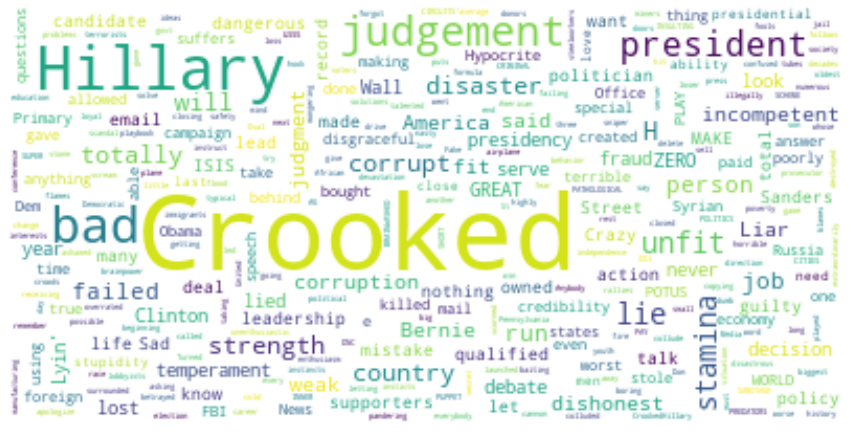

In [204]:
# Create and generate a word cloud image:
wordcloud = WordCloud(
    max_font_size=50, collocations=False, 
    max_words=1000, 
    background_color="white").generate(text)
# Note:remove redunct words: collocations=False
# Turning collections off will get rid of words that are 
# frequently grouped together in your text. It will get rid of some 
# things you probably don't like, for instance, "oh oh".

# Display the generated image:
plt.figure(figsize=[15,15])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("result/"+filepath+".png", format="png")
plt.show()


# Plot with flag shape

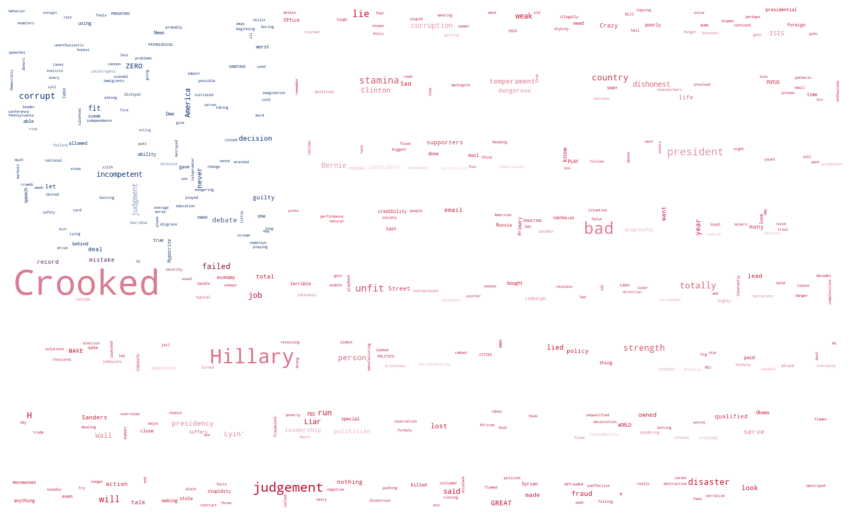

In [205]:
# Reference: https://www.datacamp.com/community/tutorials/wordcloud-python

# Generate a word cloud image of US flag
mask = np.array(Image.open("img/us.jpeg"))
wordcloud_usa = WordCloud(
    background_color="white", mode="RGBA", 
    collocations=False, 
    max_words=1000, mask=mask).generate(text)
# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[15,15])
plt.imshow(wordcloud_usa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
# plt.savefig("result/"+filepath+".us.png", format="png")

plt.show()


# Plot with DT shape

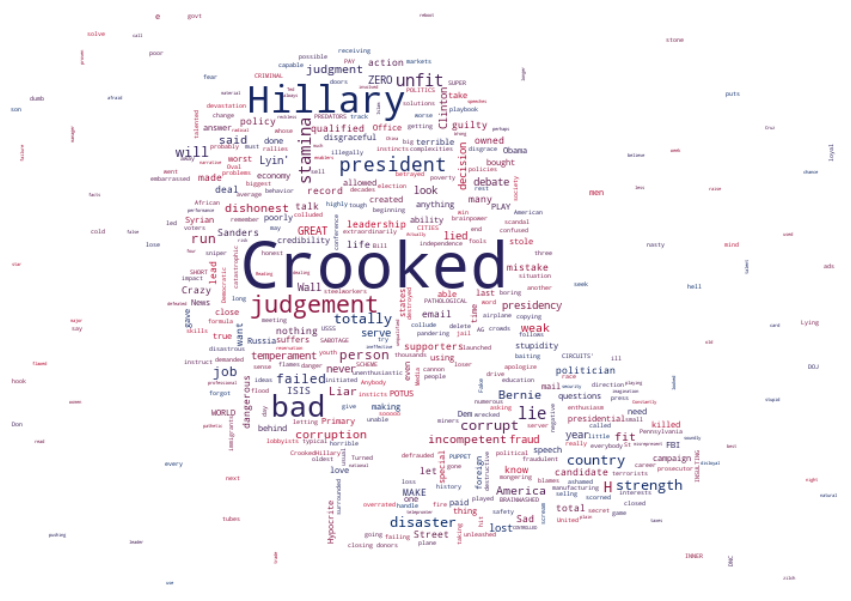

In [206]:
# Reference: https://medium.com/@kyawsawhtoon/a-wordcloud-for-trumps-tweets-f40c350271b4

# Generate a word cloud image of DT
mask = np.array(Image.open("img/DT.png"))

colors = ["#BF0A30", "#002868"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)
wordcloud_usa = WordCloud(
    width = 600, height = 400, random_state=1, 
    collocations=False, 
    colormap=cmap, background_color="white", 
    max_words=1000, mask=mask).generate(text)

# create coloring from image
plt.figure(figsize=[15,15])
plt.imshow(wordcloud_usa, interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("result/"+filepath+".dt.png", format="png")

plt.show()

# Frequency plot

['Crooked', 'Hillary', 'Crooked', 'Crooked', 'Hillary', 'Crooked', 'Hillary', 'Crooked', 'Hillary', 'Crooked', 'Hillary', 'Crooked', 'Hillary', 'Crooked', 'Hillary', 'Crooked', 'Hillary', 'Crooked', 'Hillary', 'Crooked', 'Hillary', 'Crooked', 'Hillary', 'gone', 'stone', 'cold', 'CRAZY', 'Crooked', 'Crooked', 'Crooked', 'Hillary', 'Crooked', 'Hillary', 'Crooked', 'Crooked', 'Crooked', 'Hillary', 'Crooked', 'Crooked', 'Crooked', 'Hillary', 'Crooked', 'Hillary', 'Clinton', 'Crooked', 'Crooked', 'Hillary', 'Crooked', 'Crooked', 'Hillary']


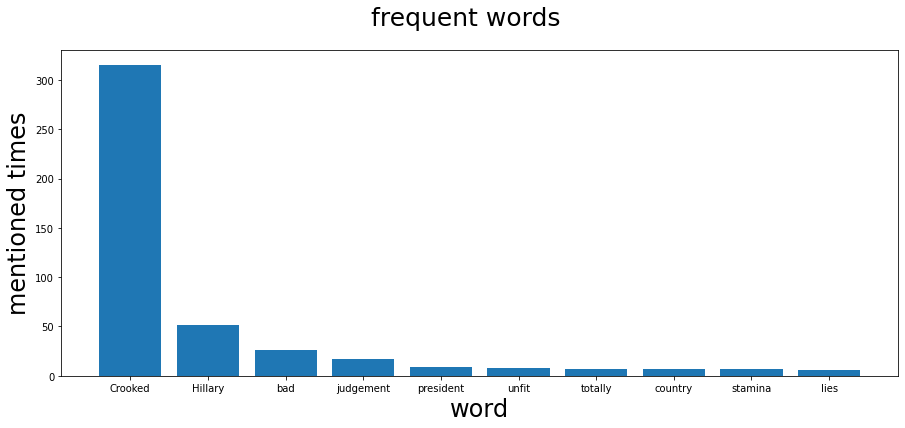

In [207]:
# remove stopwords
tokenizer = nltk.RegexpTokenizer(r"\w+")
text_tokens = tokenizer.tokenize(text)
tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

# delete words that only contains one word
tokens_without_sw = [a for a in tokens_without_sw if len(a) > 1]
print(tokens_without_sw[:50])

# count frequence
counter=collections.Counter(tokens_without_sw)
# print(counter)
# Counter({1: 4, 2: 4, 3: 2, 5: 2, 4: 1})
# print(counter.values())



# plot all
# plt.bar(*zip(*counter.items()))

# plot top 10
frq_counter = counter.most_common(10)
frq_counter = dict(frq_counter)

plt.figure(figsize=[15,6])
plt.bar(frq_counter.keys(), frq_counter.values())
plt.suptitle('frequent words', fontsize=25)
plt.xlabel('word', fontsize=24)
plt.ylabel('mentioned times', fontsize=24)

# store to file
plt.savefig("result/"+filepath+".frq.png", format="png")

plt.show()